In [1]:
import sys, os
print('Python:  ', sys.version)
print('Active Conda Environment: ', os.getenv('CONDA_DEFAULT_ENV'))

Python:   3.12.12 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 20:05:38) [MSC v.1929 64 bit (AMD64)]
Active Conda Environment:  pyarima


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation

Calculated Pearson Correlation Coefficient (r): 0.9999999999999999


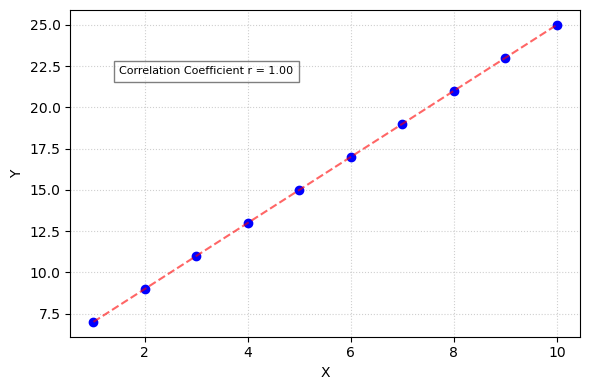

In [3]:
X = np.arange(1, 11)
Y = 2 * X + 5

correlation_matrix = np.corrcoef(X, Y)
correlation_coefficient = correlation_matrix[0, 1]

plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='blue', zorder=2, label='Data Points')
# Plot the line itself
plt.plot(X, Y, color='red', linestyle='--', alpha=0.6, label='Perfect Linear Fit')

plt.text(X[0] + 0.5, Y[-1] - 3, f'Correlation Coefficient r = {correlation_coefficient:.2f}',
         fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('X')
plt.ylabel('Y')
#plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig('perfect_correlation_plot.png')

print(f"Calculated Pearson Correlation Coefficient (r): {correlation_coefficient}")

### Correlation Visualization

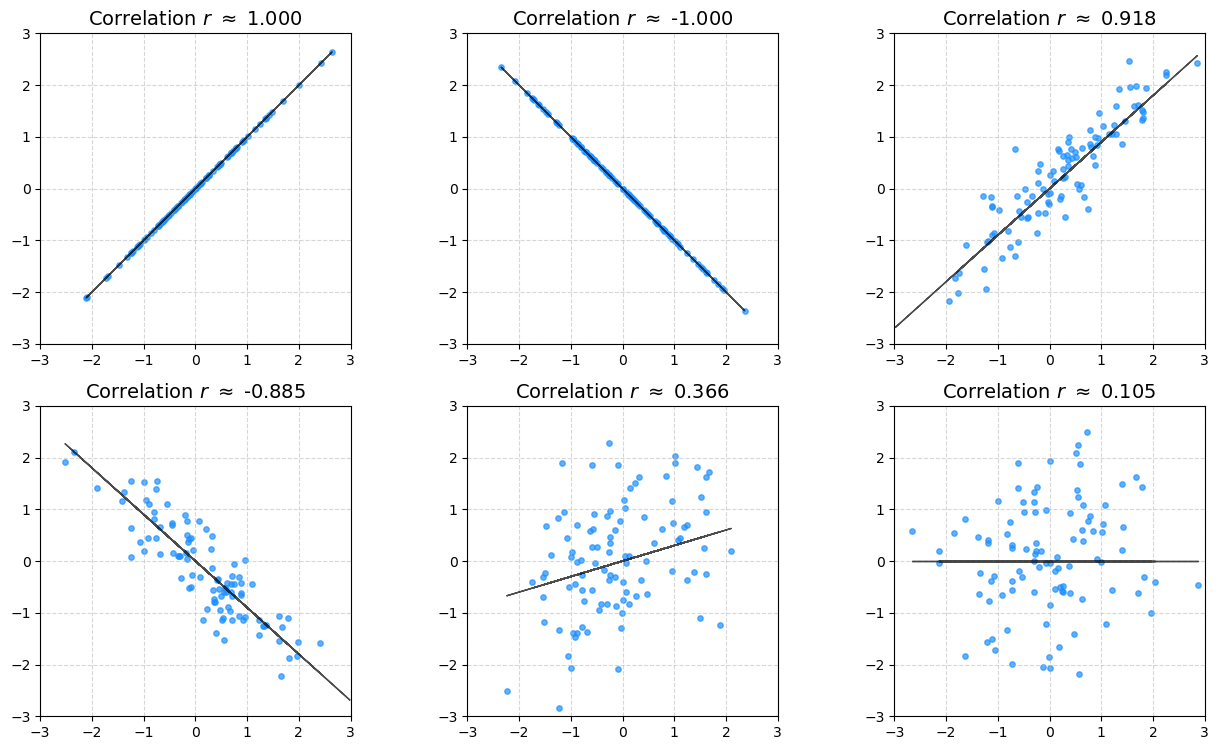

In [4]:
r_values = [1.0, -1.0, 0.9, -0.9, 0.3, 0.0]
N = 100

fig, axes = plt.subplots(2, 3, figsize=(13, 8))
axes = axes.flatten() # Flatten the 2x3 array for easy indexing

for i, r in enumerate(r_values):
    # Generate X and independent error term epsilon (both standard normal)
    X = np.random.randn(N)
    epsilon = np.random.randn(N)

    # Generate Y with the target correlation r
    if r == 1.0:
        Y = X
        y = X
    elif r == -1.0:
        Y = -X
        y = -X
    else:
        # Use the formula for |r| < 1
        Y = r * X + np.sqrt(1 - r**2) * epsilon
        y = r*X
    # Calculate the actual correlation coefficient for the generated sample
    actual_r = np.corrcoef(X, Y)[0, 1]

    # Plot the data
    ax = axes[i]
    ax.scatter(X, Y, s=15, alpha=0.7, color='dodgerblue')
    ax.plot(X, y, linewidth=1, alpha=0.7, color='black')
    
    # Set consistent axis limits and aspect ratio for visual comparison
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_aspect('equal', adjustable='box')
    ax.grid(linestyle='--', alpha=0.5)

    # Set the title with the actual calculated correlation
    ax.set_title(f'Correlation $r$ $\\approx$ {actual_r:.3f}', fontsize=14)

# Add an overall title and adjust layout
#fig.suptitle('Illustration of Different Pearson Correlation Coefficients (2x3 Layout)', fontsize=18, y=1.01)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Save the figure
plt.savefig('correlation_illustration_2x3_plots.png')

#### Auto correlation function

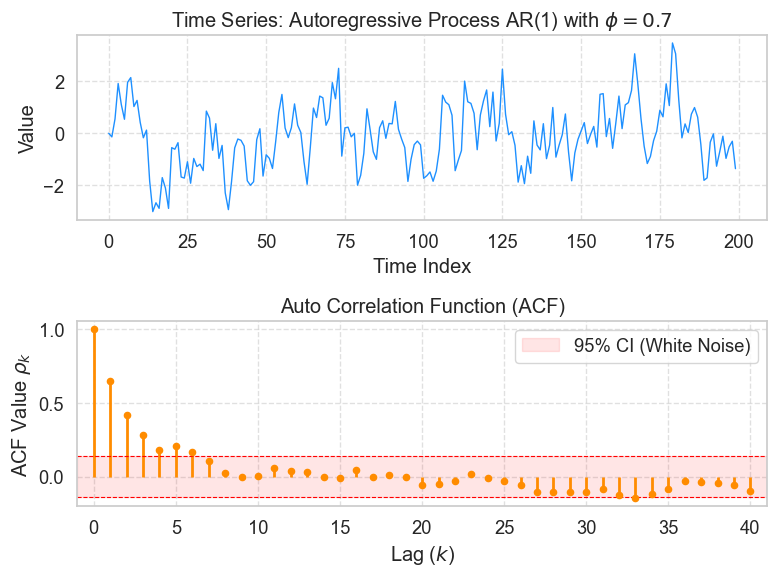

In [26]:
N = 200  # Number of data points
phi = 0.7 # Autoregressive coefficient (0.7 implies a clear positive autocorrelation)
np.random.seed(42) # for reproducibility

series = np.zeros(N)
noise = np.random.randn(N)

for t in range(1, N):
    series[t] = phi * series[t-1] + noise[t]

ts = pd.Series(series)

# 2. Function to compute ACF values (using pandas built-in autocorrelation method)
def calculate_acf(ts, max_lag):
    acf_values = [ts.autocorr(lag=k) for k in range(max_lag + 1)]
    return acf_values

max_lag = 40
acf_values = calculate_acf(ts, max_lag)
lags = np.arange(max_lag + 1)

# Calculate 95% Confidence Bounds (for white noise)
# CI = +/- 1.96 / sqrt(N)
ci_bound = 1.96 / np.sqrt(N)

# 3. Plot the Time Series and the ACF (Correlogram)
fig, axes = plt.subplots(2, 1, figsize=(8,6), sharex=False)

axes[0].plot(ts, color='dodgerblue', linewidth=1)
axes[0].set_title(f'Time Series: Autoregressive Process AR(1) with $\\phi = {phi}$')
axes[0].set_xlabel('Time Index')
axes[0].set_ylabel('Value')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: Auto Correlation Function (ACF) - Correlogram
# Vertical lines and dots for ACF values
axes[1].vlines(lags, 0, acf_values, colors='darkorange', linewidth=2, zorder=2)
axes[1].scatter(lags, acf_values, s=20, color='darkorange', zorder=3)

# Confidence Intervals (Shaded Area and Dashed Lines)
axes[1].axhspan(-ci_bound, ci_bound, color='red', alpha=0.1, label='95% CI (White Noise)')
axes[1].axhline(y=ci_bound, color='red', linestyle='--', linewidth=0.8)
axes[1].axhline(y=-ci_bound, color='red', linestyle='--', linewidth=0.8)

axes[1].set_title(f'Auto Correlation Function (ACF)')
axes[1].set_xlabel('Lag ($k$)')
axes[1].set_ylabel('ACF Value $\\rho_k$')
axes[1].set_xticks(lags[::5])
axes[1].set_xlim(-1, max_lag + 1)
axes[1].legend(loc='upper right')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

In [6]:
N = 200  # Number of data points
phi = 0.7 # Autoregressive coefficient
np.random.seed(42)

series = np.zeros(N)
noise = np.random.randn(N)

# Generate the AR(1) process: X_t = phi * X_{t-1} + epsilon_t
for t in range(1, N):
    series[t] = phi * series[t-1] + noise[t]

# Convert to pandas Series for easy manipulation
ts = pd.Series(series, name='Original_X(t)')

# 2. Create Lagged Data
max_lags = 5
df = pd.DataFrame(ts)

# Generate and add lagged columns to the DataFrame
for k in range(1, max_lags + 1):
    # .shift(k) moves the data k periods back
    df[f'Lagged_X(t-{k})'] = ts.shift(k)

# 3. Output to CSV
output_filename = 'time_series_lagged_data.csv'
df.to_csv(output_filename, index=False)

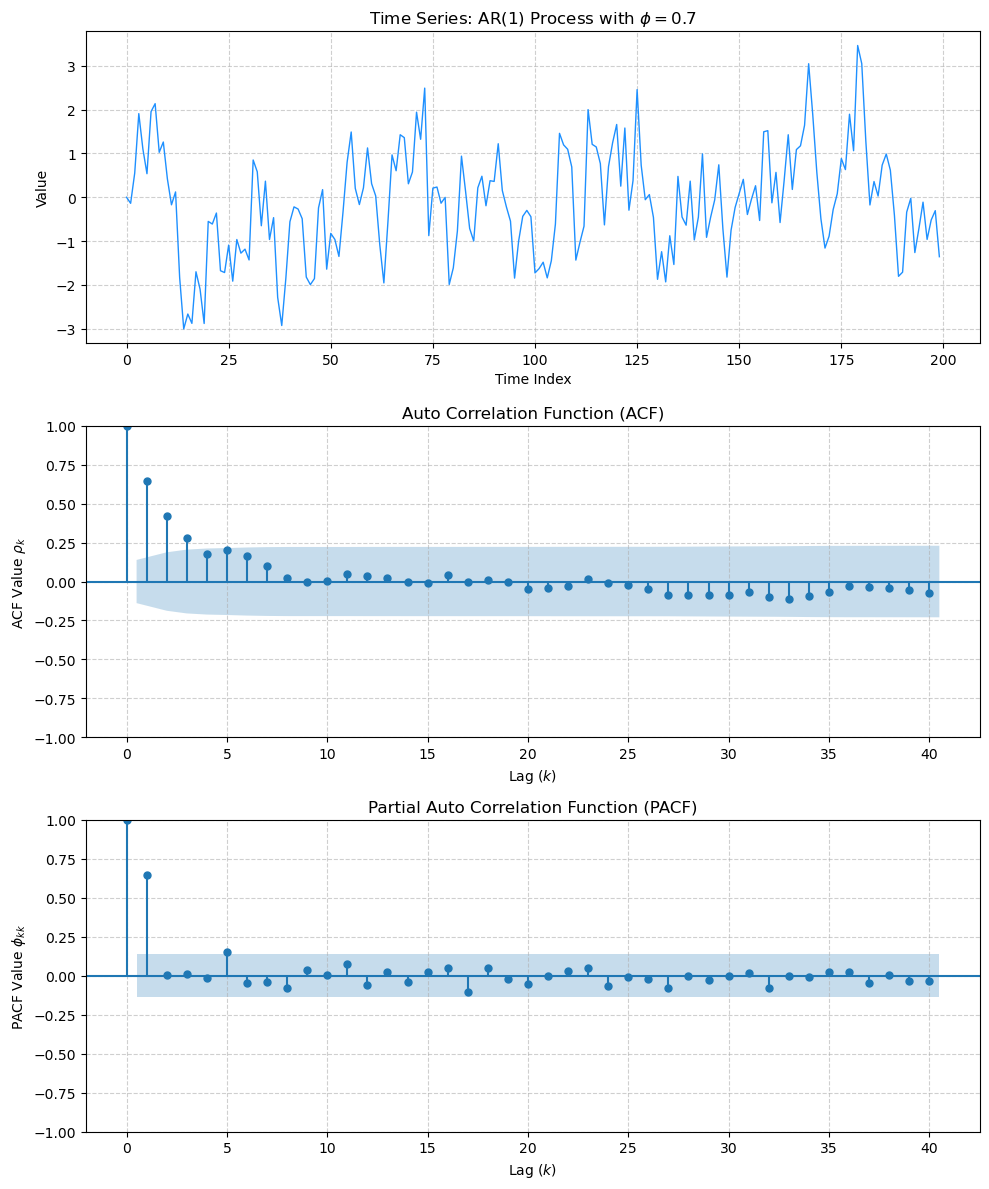

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Core functions

# 1. Generate an AR(1) Time Series
N = 200
phi = 0.7 # Autoregressive coefficient
np.random.seed(42)

series = np.zeros(N)
noise = np.random.randn(N)
for t in range(1, N):
    series[t] = phi * series[t-1] + noise[t]
ts = pd.Series(series)

max_lag = 40

# 2. Plot the Time Series, ACF, and PACF in a 3x1 layout
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# Plot 1: Time Series
axes[0].plot(ts, color='dodgerblue', linewidth=1)
axes[0].set_title(f'Time Series: AR(1) Process with $\\phi = {phi}$')
axes[0].set_xlabel('Time Index')
axes[0].set_ylabel('Value')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: Auto Correlation Function (ACF)
# Plot_acf calculates and plots the ACF with 95% confidence intervals (blue shaded area)
plot_acf(ts, ax=axes[1], lags=max_lag, alpha=0.05, title='Auto Correlation Function (ACF)')
axes[1].set_xlabel('Lag ($k$)')
axes[1].set_ylabel('ACF Value $\\rho_k$')
axes[1].grid(True, linestyle='--', alpha=0.6)

# Plot 3: Partial Auto Correlation Function (PACF)
# Plot_pacf calculates and plots the PACF
plot_pacf(ts, ax=axes[2], lags=max_lag, alpha=0.05, method='ywmle', title='Partial Auto Correlation Function (PACF)')
axes[2].set_xlabel('Lag ($k$)')
axes[2].set_ylabel('PACF Value $\\phi_{kk}$')
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('acf_pacf_illustration.png')

### Q-Q Plot

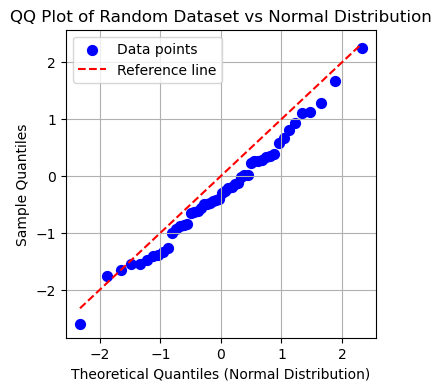

In [8]:
from scipy import stats
np.random.seed(45)

# Generate a random dataset of 50 observations from a normal distribution
data = np.random.normal(loc=0, scale=1, size=50)

# Sort the data
data_sorted = np.sort(data)

# Calculate the theoretical quantiles for a normal distribution
n = len(data)
percentiles = (np.arange(1, n + 1) - 0.5) / n
theoretical_quantiles = stats.norm.ppf(percentiles, loc=0, scale=1)

# Create the QQ plot
plt.figure(figsize=(4, 4))
plt.scatter(theoretical_quantiles, data_sorted, color='blue', s=50, label='Data points')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label='Reference line')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot of Random Dataset vs Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
data_sorted

array([-2.59687863, -1.75075239, -1.65426275, -1.54687318, -1.54136684,
       -1.47331424, -1.4119755 , -1.39381267, -1.34025807, -1.27163265,
       -1.00860081, -0.93102638, -0.87330464, -0.85418835, -0.84134033,
       -0.65570411, -0.62769549, -0.60694397, -0.55407712, -0.49954587,
       -0.49505193, -0.47439702, -0.44027617, -0.42444883, -0.39514554,
       -0.30191524, -0.27055682, -0.20430091, -0.18968296, -0.1468827 ,
       -0.12150685, -0.01568471,  0.02524419,  0.02637477,  0.22808162,
        0.25959597,  0.2603217 ,  0.28968091,  0.33263215,  0.35430274,
        0.39407266,  0.57904417,  0.67312896,  0.8019266 ,  0.93510554,
        1.11098606,  1.1293033 ,  1.27840959,  1.67029982,  2.24808957])

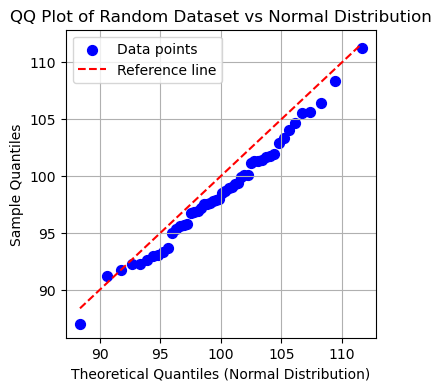

In [10]:
from scipy import stats
np.random.seed(45)

# Generate a random dataset of 50 observations from a normal distribution
data = np.random.normal(loc=100, scale=5, size=50)

# Sort the data
data_sorted = np.sort(data)

# Calculate the theoretical quantiles for a normal distribution
n = len(data)
percentiles = (np.arange(1, n + 1) - 0.5) / n
theoretical_quantiles = stats.norm.ppf(percentiles, loc=100, scale=5)

# Create the QQ plot
plt.figure(figsize=(4, 4))
plt.scatter(theoretical_quantiles, data_sorted, color='blue', s=50, label='Data points')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label='Reference line')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot of Random Dataset vs Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
data_sorted

array([ 87.01560685,  91.24623807,  91.72868624,  92.26563409,
        92.29316579,  92.63342879,  92.9401225 ,  93.03093664,
        93.29870964,  93.64183673,  94.95699595,  95.34486811,
        95.63347678,  95.72905823,  95.79329833,  96.72147944,
        96.86152253,  96.96528013,  97.22961441,  97.50227067,
        97.52474034,  97.62801492,  97.79861914,  97.87775586,
        98.02427229,  98.4904238 ,  98.64721588,  98.97849547,
        99.05158521,  99.26558649,  99.39246573,  99.92157646,
       100.12622093, 100.13187386, 101.14040812, 101.29797983,
       101.30160851, 101.44840456, 101.66316077, 101.7715137 ,
       101.97036328, 102.89522083, 103.36564482, 104.00963298,
       104.67552772, 105.5549303 , 105.64651652, 106.39204795,
       108.3514991 , 111.24044787])

In [12]:
theoretical_quantiles

array([ 88.36826063,  90.59603196,  91.77573187,  92.62104486,
        93.29622483,  93.8673594 ,  94.36804435,  94.81783305,
        95.22917373,  95.61051852,  95.96789376,  96.30576575,
        96.62755125,  96.93593504,  97.2330764 ,  97.52074826,
        97.80043417,  98.07339767,  98.34073327,  98.60340483,
        98.86227512,  99.11812918,  99.37169327,  99.62365069,
        99.87465546, 100.12534454, 100.37634931, 100.62830673,
       100.88187082, 101.13772488, 101.39659517, 101.65926673,
       101.92660233, 102.19956583, 102.47925174, 102.7669236 ,
       103.06406496, 103.37244875, 103.69423425, 104.03210624,
       104.38948148, 104.77082627, 105.18216695, 105.63195565,
       106.1326406 , 106.70377517, 107.37895514, 108.22426813,
       109.40396804, 111.63173937])

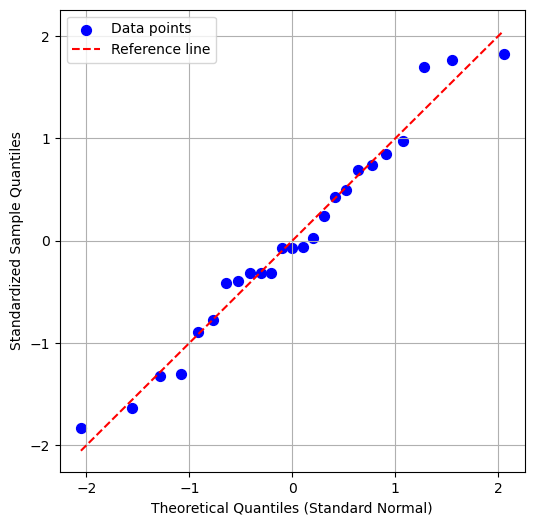

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random dataset of 50 observations from a normal distribution
data = np.random.normal(loc=100, scale=10, size=25)
datas = np.sort(data)
# Standardize the data to z-scores (mean=0, std=1)
data_mean = np.mean(data)
data_std = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
data_standardized = (data - data_mean) / data_std

# Sort the standardized data
data_sorted = np.sort(data_standardized)

# Calculate the theoretical quantiles for a standard normal distribution
n = len(data)
percentiles = (np.arange(1, n + 1) - 0.5) / n
theoretical_quantiles = stats.norm.ppf(percentiles, loc=0, scale=1)

# Create the QQ plot
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quantiles, data_sorted, color='blue', s=50, label='Data points')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label='Reference line')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Standardized Sample Quantiles')
#plt.title('QQ Plot of Random Dataset vs Standard Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()

### Timeseries split

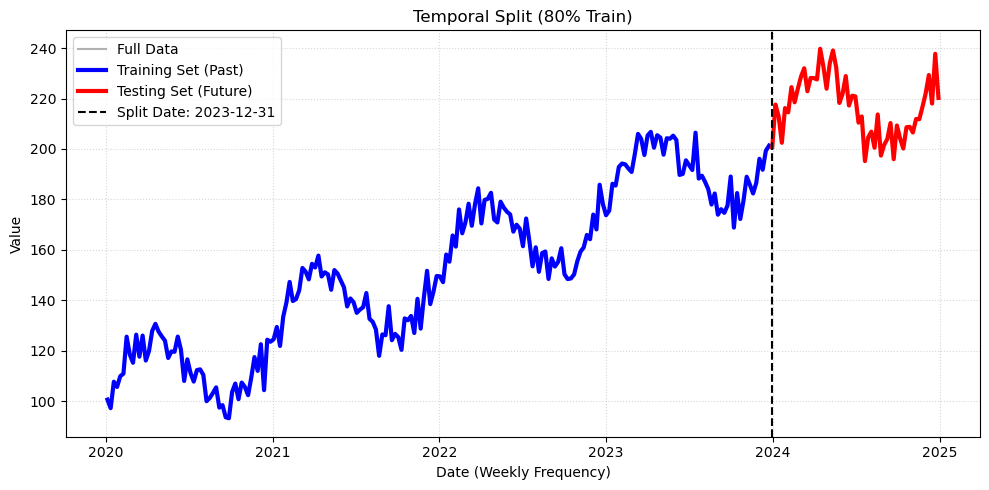

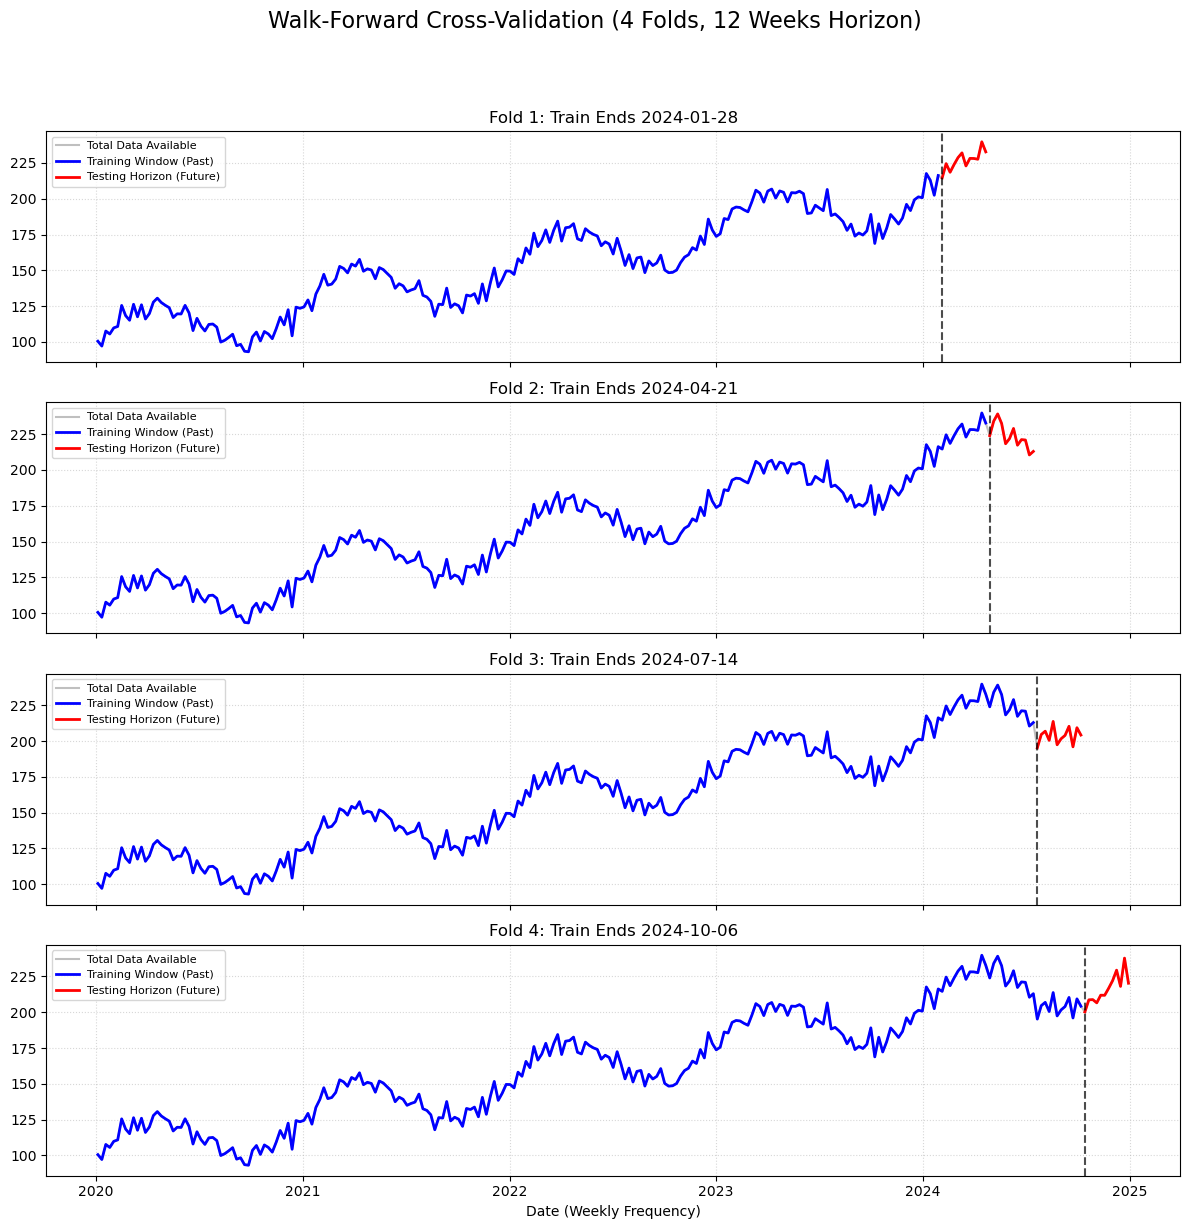

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

# --- 1. Generate Weekly Time Series Data (5 years) ---
start_date = '2020-01-01'
end_date = '2024-12-31'
dates = pd.date_range(start=start_date, end=end_date, freq='W')
N = len(dates)

# Generate synthetic data with trend and weekly seasonality
t = np.arange(N)
trend = 0.5 * t
weekly_seasonality = 20 * np.sin(t / 52 * 2 * np.pi) # 52 weeks in a year
noise = np.random.randn(N) * 5
data = trend + weekly_seasonality + noise + 100

ts_data = pd.DataFrame({'Value': data}, index=dates)


# --- ILLUSTRATION OF METHOD 1: STANDARD SPLIT (Single Cutoff) ---
def standard_split(data, split_ratio=0.8):
    """Illustrates the simple chronological train/test split."""
    
    # Determine the split index (e.g., 80% for training)
    train_size = int(len(data) * split_ratio)
    
    # Split the data chronologically
    train_set = data.iloc[:train_size]
    test_set = data.iloc[train_size:]
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Value'], label='Full Data', color='gray', alpha=0.6)
    plt.plot(train_set.index, train_set['Value'], label='Training Set (Past)', color='blue', linewidth=3)
    plt.plot(test_set.index, test_set['Value'], label='Testing Set (Future)', color='red', linewidth=3)
    
    # Add vertical line at the split point
    split_date = test_set.index[0]
    plt.axvline(x=split_date, color='black', linestyle='--', 
                label=f'Split Date: {split_date.strftime("%Y-%m-%d")}')
    
    plt.title(f'Temporal Split ({int(split_ratio*100)}% Train)')
    plt.xlabel('Date (Weekly Frequency)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()

# --- ILLUSTRATION OF METHOD 3: TIME SERIES CROSS-VALIDATION (Walk-Forward) ---
def walk_forward_cv(data, n_splits=4, test_size=12):
    """Illustrates the walk-forward validation strategy using TimeSeriesSplit."""
    
    # Initialize TimeSeriesSplit: Training window grows, test window moves forward
    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size)
    
    fig, axes = plt.subplots(n_splits, 1, figsize=(12, 3 * n_splits), sharex=True)
    fig.suptitle(f'Walk-Forward Cross-Validation ({n_splits} Folds, {test_size} Weeks Horizon)', fontsize=16, y=1.02)
    
    for i, (train_index, test_index) in enumerate(tscv.split(data)):
        
        # Get the current fold's train and test data indices
        train_dates = data.index[train_index]
        test_dates = data.index[test_index]
        
        ax = axes[i]
        
        # Plot full training window
        ax.plot(data.index[:test_index[-1] + 1], data['Value'][:test_index[-1] + 1], 
                label='Total Data Available', color='gray', alpha=0.5)
        
        # Plot the training set for the current fold
        ax.plot(train_dates, data.iloc[train_index]['Value'], 
                label='Training Window (Past)', color='blue', linewidth=2)
        
        # Plot the test set (forecast horizon)
        ax.plot(test_dates, data.iloc[test_index]['Value'], 
                label='Testing Horizon (Future)', color='red', linewidth=2)
        
        # Add vertical line at the split point
        ax.axvline(x=test_dates[0], color='black', linestyle='--', alpha=0.7)
        
        ax.set_title(f'Fold {i+1}: Train Ends {train_dates[-1].strftime("%Y-%m-%d")}')
        ax.legend(loc='upper left', fontsize=8)
        ax.grid(True, linestyle=':', alpha=0.5)
    
    axes[-1].set_xlabel('Date (Weekly Frequency)')
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# --- EXECUTE ILLUSTRATIONS ---
standard_split(ts_data, split_ratio=0.8)
walk_forward_cv(ts_data, n_splits=4, test_size=12)

In [15]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
#import warnings
#warnings.filterwarnings('ignore')

# Set seed for reproducibility
np.random.seed(42)

# Generate time series data: AR(1) process with phi=0.7, 25 observations
n_obs = 25
ar_coef = 0.7
errors = np.random.normal(0, 1, n_obs)
data = np.zeros(n_obs)
data[0] = errors[0]
for t in range(1, n_obs):
    data[t] = ar_coef * data[t-1] + errors[t]

# Create DataFrame with dates
dates = pd.date_range(start='2020-01-01', periods=n_obs, freq='ME')
ts_data = pd.Series(data, index=dates)

print("Generated Time Series Data:")
print(ts_data)

# Split: train on first 20, test on last 5
train = ts_data[:20]
test = ts_data[20:]

# Build ARIMA(1,0,0) model on train
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit()

# Forecast for test period
forecast = model_fit.forecast(steps=len(test))
forecast2 = model_fit.forecast(steps=len(train))
# Compute RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))

print("\nTrain Data:")
print(train)
print("\nTest Data:")
print(test)
print("\nForecast:")
print(forecast)
print(f"\nRMSE: {rmse:.4f}")

Generated Time Series Data:
2020-01-31    0.496714
2020-02-29    0.209436
2020-03-31    0.794293
2020-04-30    2.079035
2020-05-31    1.221171
2020-06-30    0.620683
2020-07-31    2.013691
2020-08-31    2.177018
2020-09-30    1.054438
2020-10-31    1.280667
2020-11-30    0.433049
2020-12-31   -0.162595
2021-01-31    0.128146
2021-02-28   -1.823578
2021-03-31   -3.001423
2021-04-30   -2.663283
2021-05-31   -2.877130
2021-06-30   -1.699743
2021-07-31   -2.097844
2021-08-31   -2.880795
2021-09-30   -0.550908
2021-10-31   -0.611412
2021-11-30   -0.360460
2021-12-31   -1.677070
2022-01-31   -1.718332
Freq: ME, dtype: float64

Train Data:
2020-01-31    0.496714
2020-02-29    0.209436
2020-03-31    0.794293
2020-04-30    2.079035
2020-05-31    1.221171
2020-06-30    0.620683
2020-07-31    2.013691
2020-08-31    2.177018
2020-09-30    1.054438
2020-10-31    1.280667
2020-11-30    0.433049
2020-12-31   -0.162595
2021-01-31    0.128146
2021-02-28   -1.823578
2021-03-31   -3.001423
2021-04-30   -

In [16]:
forecast2

2021-09-30   -2.601027
2021-10-31   -2.356041
2021-11-30   -2.141512
2021-12-31   -1.953654
2022-01-31   -1.789151
2022-02-28   -1.645099
2022-03-31   -1.518957
2022-04-30   -1.408496
2022-05-31   -1.311769
2022-06-30   -1.227066
2022-07-31   -1.152894
2022-08-31   -1.087944
2022-09-30   -1.031068
2022-10-31   -0.981263
2022-11-30   -0.937650
2022-12-31   -0.899459
2023-01-31   -0.866016
2023-02-28   -0.836731
2023-03-31   -0.811086
2023-04-30   -0.788630
Freq: ME, Name: predicted_mean, dtype: float64

### Dickey Fuller Test

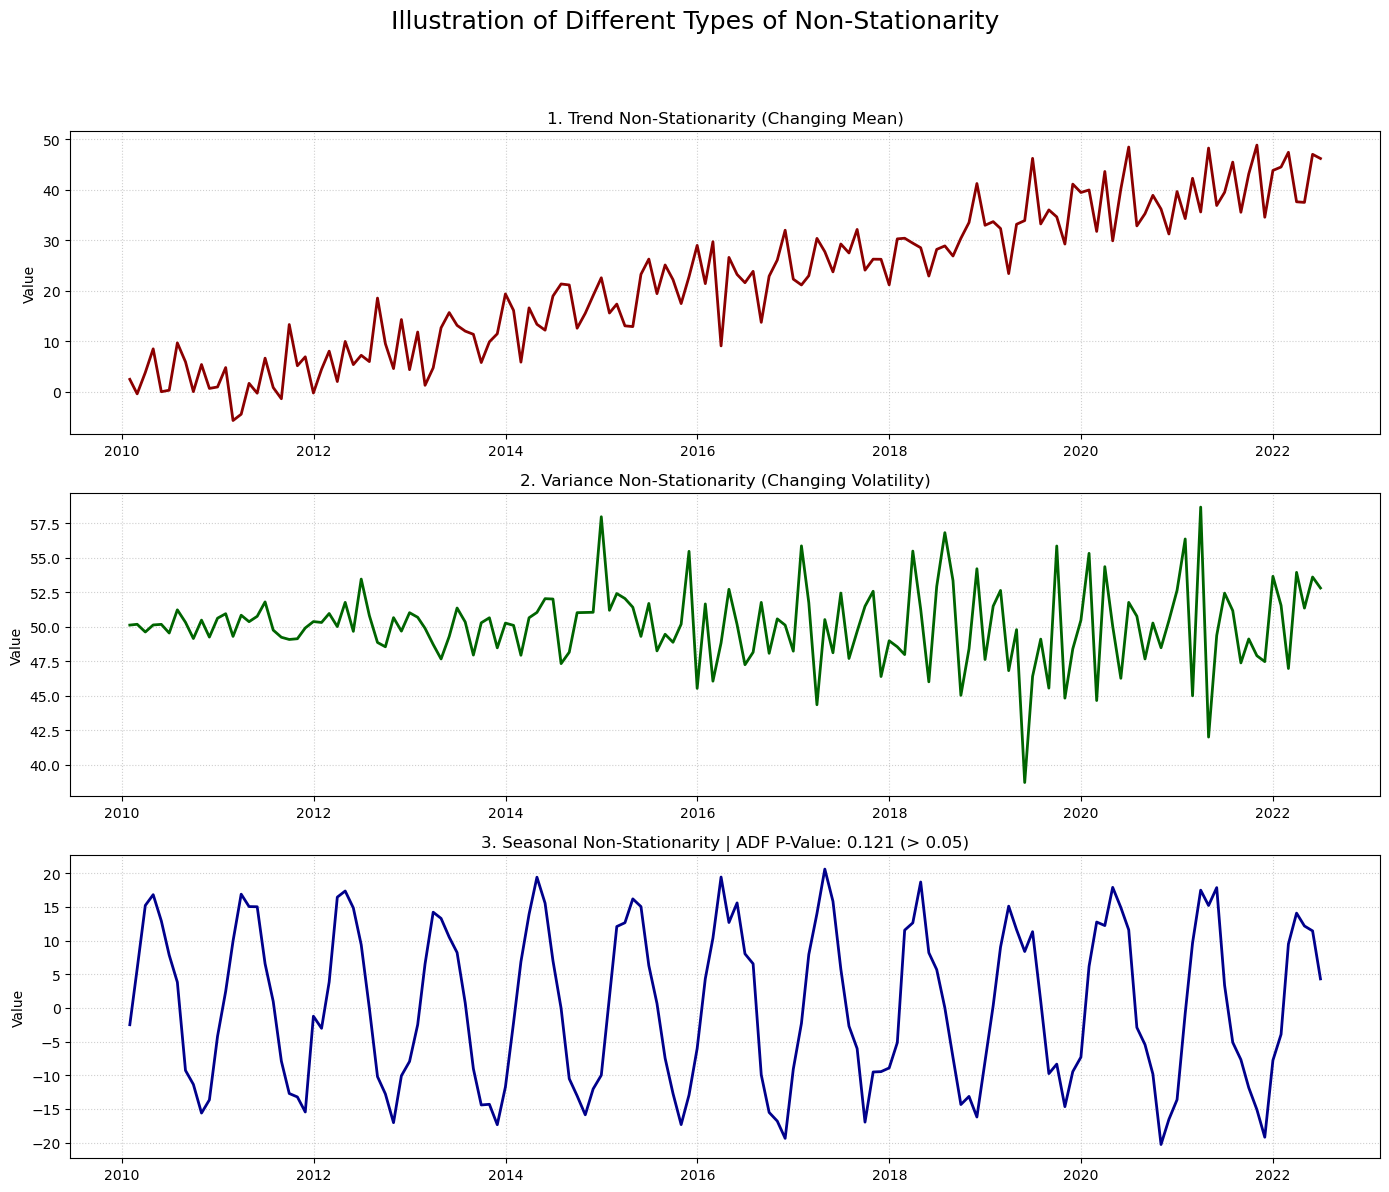


--- Summary of Augmented Dickey-Fuller (ADF) Test Results ---
ADF Test Null Hypothesis (H0): The time series is NON-STATIONARY.
We reject H0 (i.e., conclude STATIONARY) if P-Value < 0.05.
1. Trend Non-Stationary Series P-Value: 0.9537 (Non-Stationary)
2. Variance Non-Stationary Series P-Value: 0.0000 (Non-Stationary)
3. Seasonal Non-Stationary Series P-Value: 0.1211 (Non-Stationary)


In [17]:
from statsmodels.tsa.stattools import adfuller

N = 150 # Number of time steps
np.random.seed(42)
time_index = pd.date_range(start='2010-01-01', periods=N, freq='ME')

# --- Utility Function for ADF Test ---
def check_stationarity(series):
    """Performs the Augmented Dickey-Fuller test and returns the p-value."""
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value

# --- 1. Non-Stationarity due to Trend (Changing Mean) ---
# Series = Deterministic Trend + Noise
trend = 0.3 * np.arange(N)
noise_trend = np.random.randn(N) * 5
series_trend = pd.Series(trend + noise_trend, index=time_index)
p_value_trend = check_stationarity(series_trend)

# --- 2. Non-Stationarity due to Changing Variance (Heteroskedasticity) ---
# Series has a constant mean but volatility increases over time
constant_mean = 50
# Standard deviation increases linearly
std_change = 0.5 + (np.arange(N) / N) * 4 
series_variance = pd.Series(constant_mean + np.random.randn(N) * std_change, index=time_index)
p_value_variance = check_stationarity(series_variance)


# --- 3. Non-Stationarity due to Seasonality ---
# Series = Seasonality Component + Noise
seasonal_pattern = 15 * np.sin(2 * np.pi * np.arange(N) / 12) # 12-period cycle
noise_seasonal = np.random.randn(N) * 3
series_seasonal = pd.Series(seasonal_pattern + noise_seasonal, index=time_index)
p_value_seasonal = check_stationarity(series_seasonal)


# --- Plotting and Visualization ---
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=False)
plt.suptitle('Illustration of Different Types of Non-Stationarity', fontsize=18, y=1.02)

# Plot 1: Trend Non-Stationarity (Changing Mean)
axes[0].plot(series_trend, color='darkred', linewidth=2)
axes[0].set_title(f"1. Trend Non-Stationarity (Changing Mean)")
axes[0].set_ylabel('Value')
axes[0].grid(True, linestyle=':', alpha=0.6)

# Plot 2: Variance Non-Stationarity (Heteroskedasticity)
axes[1].plot(series_variance, color='darkgreen', linewidth=2)
axes[1].set_title(f"2. Variance Non-Stationarity (Changing Volatility)")
axes[1].set_ylabel('Value')
axes[1].grid(True, linestyle=':', alpha=0.6)


# Plot 3: Seasonal Non-Stationarity
axes[2].plot(series_seasonal, color='darkblue', linewidth=2)
axes[2].set_title(f"3. Seasonal Non-Stationarity | ADF P-Value: {p_value_seasonal:.3f} (> 0.05)")
axes[2].set_ylabel('Value')
axes[2].grid(True, linestyle=':', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

# --- Print Summary of ADF Tests ---
print("\n--- Summary of Augmented Dickey-Fuller (ADF) Test Results ---")
print("ADF Test Null Hypothesis (H0): The time series is NON-STATIONARY.")
print("We reject H0 (i.e., conclude STATIONARY) if P-Value < 0.05.")
print(f"1. Trend Non-Stationary Series P-Value: {p_value_trend:.4f} (Non-Stationary)")
print(f"2. Variance Non-Stationary Series P-Value: {p_value_variance:.4f} (Non-Stationary)")
print(f"3. Seasonal Non-Stationary Series P-Value: {p_value_seasonal:.4f} (Non-Stationary)")

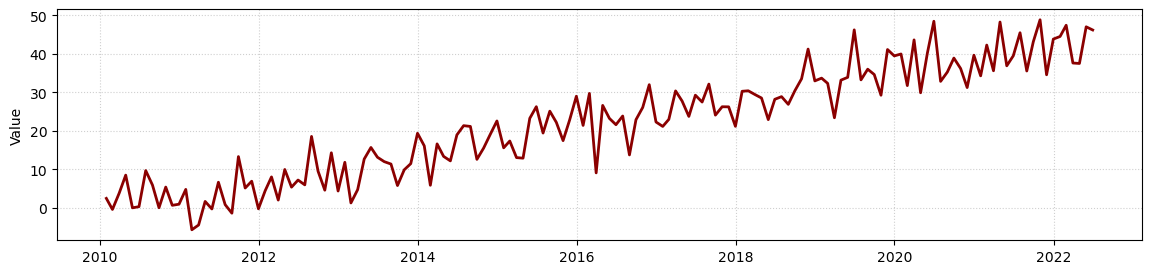

In [18]:
# Plot 1: Trend Non-Stationarity (Changing Mean)
fig, axes = plt.subplots(figsize=(14, 3), sharex=False)
axes.plot(series_trend, color='darkred', linewidth=2)
#axes.set_title(f"1. Trend Non-Stationarity (Changing Mean)")
axes.set_ylabel('Value')
axes.grid(True, linestyle=':', alpha=0.6)

In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(series_trend, regression='ct', autolag='AIC')
print('Results of ADF test: ADF: ',result[0],'p_value: ', result[1], 'used_lag:  ',result[2])

Results of ADF test: ADF:  -13.120384446909595 p_value:  9.592505795544926e-21 used_lag:   0


In [20]:
result

(-13.120384446909595,
 9.592505795544926e-21,
 0,
 149,
 {'1%': -4.020850098604906,
  '5%': -3.4403764971618362,
  '10%': -3.1445865794938195},
 802.8177728714411)

### ADF - Test

Data created: Deterministic Trend + Stationary Noise.
Length of series: 200
--------------------------------------------------
Results of ADF test (Regression="ct"):
ADF Statistic: -15.0148
P-value: 0.0000000000  (< 0.05, so we reject H0)
Used Lag: 0
Critical Values (for comparison): {'1%': -4.004997848936356, '5%': -3.4327862452981046, '10%': -3.140144918368515}
--------------------------------------------------
Conclusion: The ADF test REJECTS the Null Hypothesis (Unit Root).
The series is statistically 'stationary' or, more precisely, 'Trend Stationary' with respect to this test form.


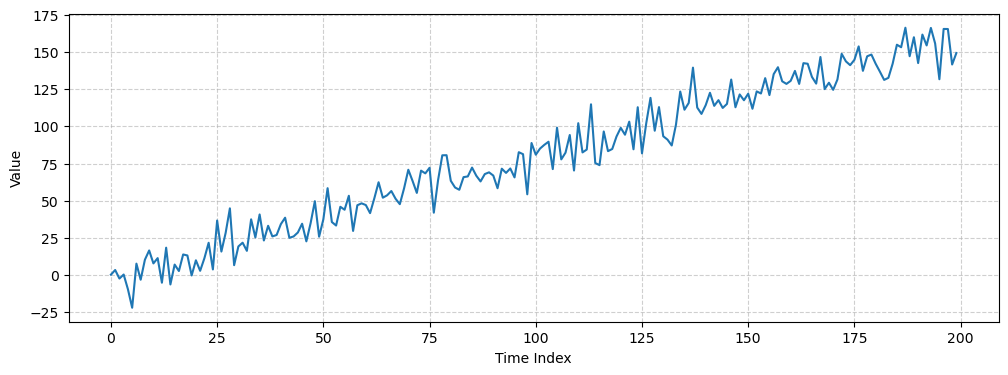

In [21]:
from statsmodels.tsa.stattools import adfuller

# Set up parameters
N = 200  # Number of data points
np.random.seed(45) # Use a different seed for distinct data

# 1. Create the Deterministic Trend Component
# A strong, predictable upward slope (y = 0.8 * t)
deterministic_trend = 0.8 * np.arange(N)

# 2. Create the Stationary Residual Component (Noise)
# The noise component should be pure white noise (stationary)
stationary_noise = np.random.randn(N) * 10

# 3. Combine them to create a Trend Stationary Series
# The series is non-stationary because its mean (and level) is changing over time.
series_trend_stationary = pd.Series(deterministic_trend + stationary_noise)

# Display the data's nature
print(f"Data created: Deterministic Trend + Stationary Noise.")
print(f"Length of series: {len(series_trend_stationary)}")
print("-" * 50)

# --- Perform the ADF Test with regression='ct' ---
# The 'ct' form includes both a Constant (alpha) and a Trend (beta * t) term.
# This form is designed to capture and remove the deterministic trend created above.
result = adfuller(series_trend_stationary, regression='ct', autolag='AIC')

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
critical_values = result[4]

print('Results of ADF test (Regression="ct"):')
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {p_value:.10f}  (< 0.05, so we reject H0)")
print(f"Used Lag: {used_lag}")
print("Critical Values (for comparison):", critical_values)
print("-" * 50)

# Interpretation
if p_value <= 0.05:
    print("Conclusion: The ADF test REJECTS the Null Hypothesis (Unit Root).")
    print("The series is statistically 'stationary' or, more precisely, 'Trend Stationary' with respect to this test form.")
else:
    print("Conclusion: The ADF test FAILS TO REJECT the Null Hypothesis (Unit Root).")

# Optional: Plot the data to show the visible trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(series_trend_stationary, label='Trend Stationary Data')
#plt.title(f'Synthetic Series with Deterministic Trend (ADF p-value: {p_value:.3e})')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.6)
#plt.legend()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(series_trend_stationary, regression='ct', autolag='AIC')
print('Results of ADF test: ADF: ',result[0],'p_value: ', result[1], 'used_lag:  ',result[2])

Results of ADF test: ADF:  -15.014798992042708 p_value:  2.1497734876838726e-22 used_lag:   0


In [23]:
series_diff = series_trend_stationary.diff().dropna()

result = adfuller(series_diff, regression='ct', autolag='AIC')
print('Results of ADF test: ADF: ',result[0],'p_value: ', result[1], 'used_lag:  ',result[2])

Results of ADF test: ADF:  -9.892875965406228 p_value:  3.900511240516092e-15 used_lag:   6


### Skewness and Kurtosis

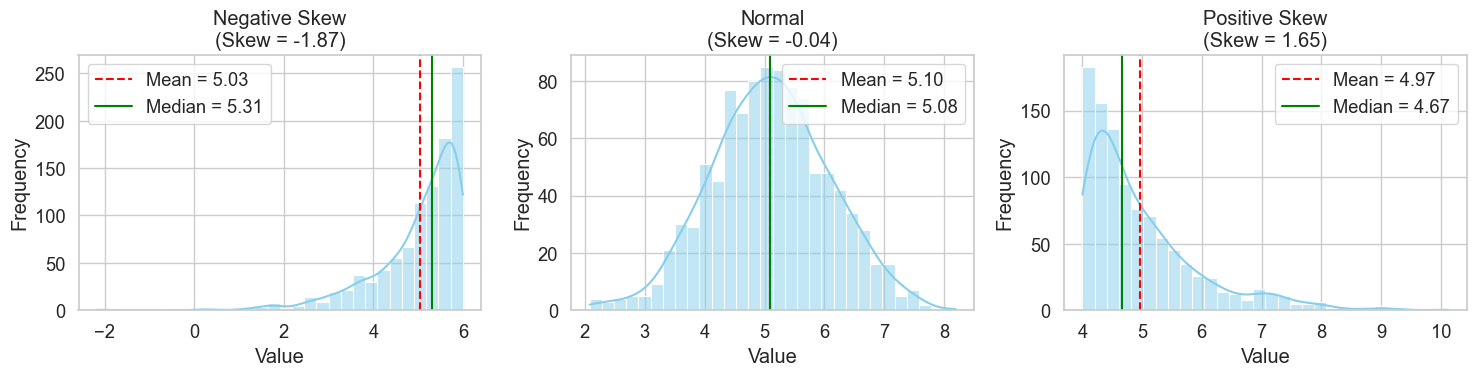

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Generate example data
np.random.seed(42)

# Negative skew: Flip an exponential and shift it
data_neg = -np.random.exponential(scale=1, size=1000) + 6

# Normal distribution
data_norm = np.random.normal(loc=5, scale=1, size=1000)

# Positive skew: Standard exponential shifted
data_pos = np.random.exponential(scale=1, size=1000) + 4

datasets = [data_neg, data_norm, data_pos]
titles = ["Negative Skew", "Normal", "Positive Skew"]

# Calculate skewness
skews = [skew(d) for d in datasets]

# Create plots horizontally
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, data, title, skw in zip(axes, datasets, titles, skews):
    sns.histplot(data, bins=30, kde=True, color="skyblue", ax=ax)
    
    # Compute mean and median
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    # Add mean and median lines
    ax.axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.2f}")
    ax.axvline(median_val, color='green', linestyle='-', label=f"Median = {median_val:.2f}")
    
    ax.legend()
    ax.set_title(f"{title}\n(Skew = {skw:.2f})")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### Kurtosis

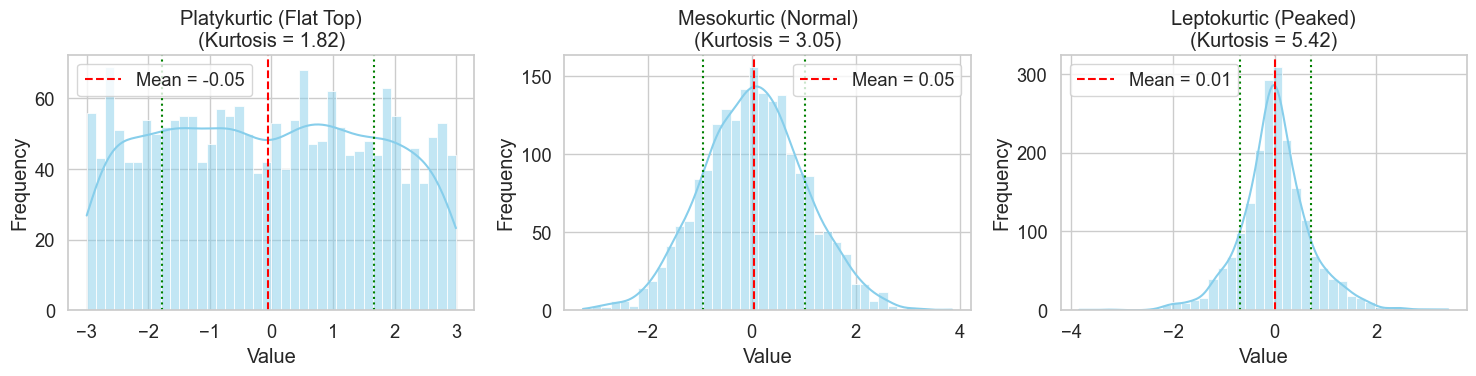

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Set visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
np.random.seed(42)

# Generate data
# Mesokurtic: Normal distribution (reference)
data_meso = np.random.normal(loc=0, scale=1, size=2000)

# Platykurtic: Flatter distribution (uniform)
data_platy = np.random.uniform(low=-3, high=3, size=2000)

# Leptokurtic: Peaked distribution (Laplace / t distribution with small df)
data_lepto = np.random.laplace(loc=0, scale=0.5, size=2000)

datasets = [data_platy, data_meso, data_lepto]
titles = ["Platykurtic (Flat Top)", "Mesokurtic (Normal)", "Leptokurtic (Peaked)"]

# Calculate kurtosis
kurt_vals = [kurtosis(d, fisher=False) for d in datasets]  # Fisher=True → normal has kurtosis ≈ 0

# Create plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, data, title, k in zip(axes, datasets, titles, kurt_vals):
    sns.histplot(data, bins=40, kde=True, color="skyblue", ax=ax)
    mean_val = np.mean(data)
    std_val = np.std(data)
    
    # Add mean and ±1σ lines
    ax.axvline(mean_val, color="red", linestyle="--", label=f"Mean = {mean_val:.2f}")
    ax.axvline(mean_val - std_val, color="green", linestyle=":")
    ax.axvline(mean_val + std_val, color="green", linestyle=":")
    
    ax.legend()
    ax.set_title(f"{title}\n(Kurtosis = {k:.2f})")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()
